<class 'networkx.classes.graph.Graph'>


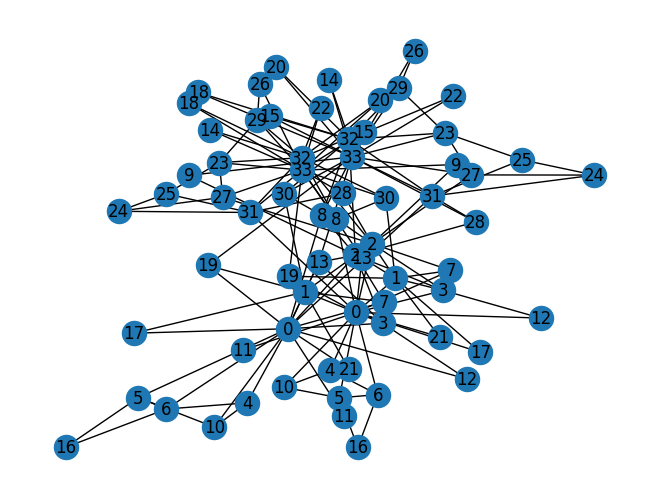

In [2]:
import networkx as nx
G = nx.karate_club_graph()
print(type(G))
nx.draw(G, with_labels=True)
# Visualize the graph
nx.draw(G, with_labels = True)

In [3]:
def average_degree(num_edges, num_nodes):
    # TODO: Implement this function that takes number of edges
    # and number of nodes, and returns the average node degree of
    # the graph. Round the result to nearest integer (for example
    # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

    avg_degree = 0

    ############# Your code here ############
    avg_degree = avg_degree + num_edges *2 / num_nodes
    avg_degree = round(avg_degree)

    #########################################

    return avg_degree


num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [4]:
def average_clustering_coefficient(G):
    # TODO: Implement this function that takes a nx.Graph
    # and returns the average clustering coefficient. Round
    # the result to 2 decimal places (for example 3.333 will
    # be rounded to 3.33 and 3.7571 will be rounded to 3.76)

    avg_cluster_coef = 0
    sum_cluster_coef = 0

    ############# Your code here ############
    ## Note:
    ## 1: Please use the appropriate NetworkX clustering function

    avg_cluster_coef = sum(nx.clustering(G).values())/G.number_of_nodes()

    #########################################

    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.5706384782076823


In [5]:
def one_iter_pagerank(G, beta, r0, node_id):
    # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
    # The return value r1 is one interation PageRank value for the input node.
    # Please round r1 to 2 decimal places.

    r1 = 0

    ############# Your code here ############
    ## Note:
    ## 1: You should not use nx.pagerank

    r1 = (1-beta)/G.number_of_nodes()
    for node in G.nodes():
        if node != node_id:
            continue
        for neighbor in G.neighbors(node):
            r1 += beta * r0 / G.degree(neighbor)

    r1 = round(r1, 2)

    #########################################

    return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.13


In [6]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality
  # for a node in karate club network. G is the input karate club
  # network and node is the node id in the graph. Please round the
  # closeness centrality result to 2 decimal places.

  closeness = 0

  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized
  ## closeness directly, which is different from the raw (unnormalized)
  ## one that we learned in the lecture.

  ############# Your code here ############
  num_nodes = float(G.number_of_nodes())
  closeness = round(nx.closeness_centrality(G, u=node)/num_nodes, 2)
  

  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The node 5 has closeness centrality {}".format(closeness))

The node 5 has closeness centrality 0.01


In [7]:
import torch
print(torch.__version__)

2.5.1+cpu


In [8]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.8434, 0.5467, 0.2986, 0.6663],
        [0.9988, 0.6236, 0.8112, 0.8624],
        [0.4702, 0.5338, 0.3420, 0.9796]])
torch.Size([3, 4])
torch.float32
torch.int64


In [9]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  for edge in G.edges():
      edge_list.append(edge)
    

  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2, len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############
  edge_index = torch.tensor(edge_list).t()
  

  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [10]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############
  nodes = list(G.nodes())
  while len(neg_edge_list) < num_neg_samples:
      edge = random.sample(nodes, 2)
      if not G.has_edge(*edge) and edge not in neg_edge_list and edge[::-1] not in neg_edge_list:
          neg_edge_list.append(edge)


  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

def can_be_negative(G, edge):
  # TODO: Implement the function that tests if an edge is a negative
  # edge in graph G.

  is_negative = False

  ############# Your code here ############
  if not G.has_edge(*edge):
      is_negative = True

  #########################################

  return is_negative

print(f"Edge 1 can be a negative edge: {can_be_negative(G, edge_1)}")
print(f"Edge 2 can be a negative edge: {can_be_negative(G, edge_2)}")
print(f"Edge 3 can be a negative edge: {can_be_negative(G, edge_3)}")
print(f"Edge 4 can be a negative edge: {can_be_negative(G, edge_4)}")
print(f"Edge 5 can be a negative edge: {can_be_negative(G, edge_5)}")

The neg_edge_index tensor has shape torch.Size([2, 78])
Edge 1 can be a negative edge: False
Edge 2 can be a negative edge: True
Edge 3 can be a negative edge: False
Edge 4 can be a negative edge: False
Edge 5 can be a negative edge: True


In [13]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

2.5.1+cpu
Sample embedding layer: Embedding(4, 8)
tensor([[-1.2481,  0.6994, -1.1449,  1.3976,  1.4460,  0.5221, -1.3082, -0.7355]],
       grad_fn=<EmbeddingBackward0>)
tensor([[-1.2481,  0.6994, -1.1449,  1.3976,  1.4460,  0.5221, -1.3082, -0.7355],
        [-0.1558,  1.2547,  1.9366, -0.2667, -0.5365, -0.3493, -1.1316, -1.3780]],
       grad_fn=<EmbeddingBackward0>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [14]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.

  emb = None

  ############# Your code here ############
  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
  emb.weight.data = torch.rand(num_node, embedding_dim)


  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


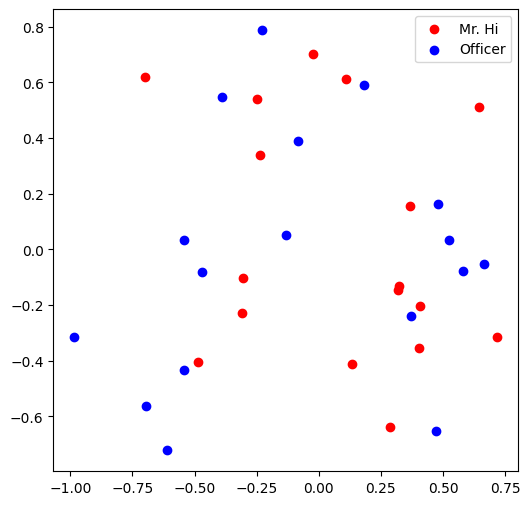

In [15]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [16]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############

  pred_label = (pred > 0.5).float()
  accu = (pred_label == label).float().mean().item()
  accu = round(accu, 4)

  #########################################

  return accu

def train(emb, loss_fn, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for i in range(epochs):

    ############# Your code here ############

    optimizer.zero_grad()
    emb_nodes = emb(train_edge)
    pred = torch.sigmoid(torch.sum(emb_nodes[0] * emb_nodes[1], dim=1))
    loss = loss_fn(pred, train_label)
    accu = accuracy(pred, train_label)
    print(f'Epoch {i}, Loss: {loss.item()}, Accuracy: {accu}')
    loss.backward()
    optimizer.step()


    #########################################

  return emb

loss_fn = nn.BCELoss()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
Epoch 0, Loss: 1.9482418298721313, Accuracy: 0.5
Epoch 1, Loss: 1.9357324838638306, Accuracy: 0.5
Epoch 2, Loss: 1.912156105041504, Accuracy: 0.5
Epoch 3, Loss: 1.878964900970459, Accuracy: 0.5
Epoch 4, Loss: 1.8375928401947021, Accuracy: 0.5
Epoch 5, Loss: 1.7894283533096313, Accuracy: 0.5
Epoch 6, Loss: 1.7357968091964722, Accuracy: 0.5
Epoch 7, Loss: 1.67794930934906, Accuracy: 0.5
Epoch 8, Loss: 1.6170508861541748, Accuracy: 0.5
Epoch 9, Loss: 1.5541741847991943, Accuracy: 0.5
Epoch 10, Loss: 1.490293025970459, Accuracy: 0.5
Epoch 11, Loss: 1.4262806177139282, Accuracy: 0.5
Epoch 12, Loss: 1.3629052639007568, Accuracy: 0.5
Epoch 13, Loss: 1.3008300065994263, Accuracy: 0.5
Epoch 14, Loss: 1.2406131029129028, Accuracy: 0.5
Epoch 15, Loss: 1.1827096939086914, Accuracy: 0.5
Epoch 16, Loss: 1.1274749040603638, Accuracy: 0.5
Epoch 17, Loss: 1.0751700401306152, Accuracy: 0.5
Epoch 18, Loss: 1.0259684324264526, Accuracy: 0.5
Epoch 19, Loss: 0.979964

Embedding(34, 16)

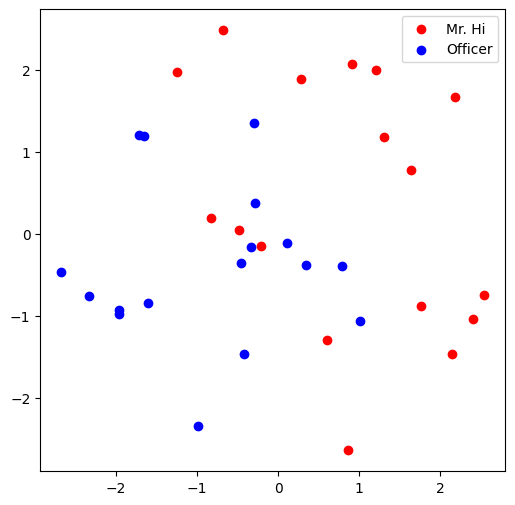

In [17]:
# Visualize the final learned embedding
visualize_emb(emb)